In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys
sys.path.append("../perf-module")

In [8]:
from PerfParser import PerfParser, StatMode, Compiler
from Preprocessor import Preprocessor
from FunctionMap import FunctionMap

In [9]:
perf_dir = "perf-report/"
stdout_dir = "stdout/valid/"
category_to_functions_path = "tags/category_to_functions.json"

In [10]:
preprocessor = Preprocessor(stdout_dir="stdout/", perf_report_dir=perf_dir)
preprocessor.filter_stdout()

In [11]:
function_map = FunctionMap(category_to_function_path=category_to_functions_path)
perf_parser = PerfParser(
    compiler=Compiler.MINIC2D,
    function_map=function_map,
    perf_dir=perf_dir,
    stdout_dir=stdout_dir,
    normalize=False
)

Initializing CNF Stats...:   0%|          | 0/366 [00:00<?, ?it/s]

Initializing CNF Stats...: 100%|██████████| 366/366 [00:23<00:00, 15.74it/s]

Aggregating Stats for all CNFs...
Total time: 552506.895
Aggregating Stats for timed out CNFs...
Total time: 493200
Aggregating Stats for completed CNFs...
Total time: 59306.895
Aggregating Stats by Category for all CNFs...
Aggregating Stats by Category for timed out CNFs...
Aggregating Stats by Category for completed CNFs...


In [12]:
json_out = "stats/cnf_stats.json"
agg_json_out = "stats/unnorm_agg_cnf_stats.json"
cat_json_out = "stats/unnorm_category_stats.json"

# timed out
timed_out_json_out = "stats/timed_out/cnf_stats.json"
timed_out_agg_json_out = "stats/timed_out/unnorm_agg_stats.json" 
timed_out_cat_json_out = "stats/timed_out/unnorm_category_stats.json"

# complete
completed_json_out = "stats/completed/cnf_stats.json"
completed_agg_json_out = "stats/completed/unnorm_agg_stats.json"
completed_cat_json_out = "stats/completed/unnorm_category_stats.json"

perf_parser.to_json(json_out, StatMode.CNF_STATS)
perf_parser.to_json(agg_json_out, StatMode.AGGREGATE_STATS)
perf_parser.to_json(cat_json_out, StatMode.CATEGORY_STATS)

# timed out
perf_parser.to_json(timed_out_json_out, StatMode.TIMED_OUT_STATS)
perf_parser.to_json(timed_out_agg_json_out, StatMode.AGGREGATE_TIMED_OUT_STATS)
perf_parser.to_json(timed_out_cat_json_out, StatMode.CATEGORY_TIMED_OUT_STATS)

# completed
perf_parser.to_json(completed_json_out, StatMode.COMPLETED_STATS)
perf_parser.to_json(completed_agg_json_out, StatMode.AGGREGATE_COMPLETED_STATS)
perf_parser.to_json(completed_cat_json_out, StatMode.CATEGORY_COMPLETED_STATS)

In [13]:
from PerfTableGenerator import PerfTableGenerator

table_generator = PerfTableGenerator(
    agg_stats_path=agg_json_out,
    category_stats_path=cat_json_out
)

In [14]:
function_table = table_generator.generate_function_table_latex()
print(function_table)

\begin{tabular}{llll}
\toprule
Function Name & Category & Total Time & Percent Time \\
\midrule
get\_and\_node & compile & 123620.80 & 22.37 \\
remove\_watched\_clause & sat & 80225.03 & 14.52 \\
set\_literal & sat & 71908.39 & 13.01 \\
construct\_vtree\_key & cache & 38293.90 & 6.93 \\
sat\_is\_subsumed\_clause & sat & 21002.36 & 3.80 \\
sat\_is\_implied\_literal & sat & 20447.43 & 3.70 \\
move\_watched\_literal & sat & 18508.44 & 3.35 \\
get\_or\_node & compile & 13573.54 & 2.46 \\
lookup\_cache & cache & 8239.96 & 1.49 \\
erase\_level & compile & 7526.11 & 1.36 \\
unmark\_vset & vtree & 7043.97 & 1.27 \\
mark\_vset & vtree & 6949.12 & 1.26 \\
compile\_dispatcher & compile & 6096.09 & 1.10 \\
should\_cache & cache & 5724.65 & 1.04 \\
vtree\_is\_shannon\_node & vtree & 5693.53 & 1.03 \\
sat\_var2pliteral & sat & 5662.81 & 1.02 \\
nnf\_node\_cmp & compile & 5302.90 & 0.96 \\
sat\_is\_instantiated\_var & sat & 4673.85 & 0.85 \\
compile\_vtree\_shannon & compile & 4321.42 & 0.78 \\
liter

In [15]:
category_table = table_generator.generate_category_table_latex()
print(category_table)

\begin{tabular}{lll}
\toprule
Category & Total Time & Percent Time \\
\midrule
sat & 232924.77 & 47.69 \\
compile & 171046.98 & 35.02 \\
cache & 61942.67 & 12.68 \\
vtree & 21528.42 & 4.41 \\
nnf & 924.42 & 0.19 \\
\bottomrule
\end{tabular}



In [16]:
timed_out_table_generator = PerfTableGenerator(
    agg_stats_path=timed_out_agg_json_out,
    category_stats_path=timed_out_cat_json_out
)

In [17]:
timed_out_function_table = timed_out_table_generator.generate_function_table_latex()
print(timed_out_function_table)

\begin{tabular}{llll}
\toprule
Function Name & Category & Total Time & Percent Time \\
\midrule
get\_and\_node & compile & 113929.56 & 23.10 \\
remove\_watched\_clause & sat & 72654.48 & 14.73 \\
set\_literal & sat & 64347.84 & 13.05 \\
construct\_vtree\_key & cache & 33907.68 & 6.88 \\
sat\_is\_subsumed\_clause & sat & 19200.96 & 3.89 \\
sat\_is\_implied\_literal & sat & 18424.44 & 3.74 \\
move\_watched\_literal & sat & 16642.44 & 3.37 \\
get\_or\_node & compile & 11331.72 & 2.30 \\
lookup\_cache & cache & 7110.36 & 1.44 \\
unmark\_vset & vtree & 7022.16 & 1.42 \\
mark\_vset & vtree & 6927.48 & 1.40 \\
erase\_level & compile & 6215.04 & 1.26 \\
compile\_dispatcher & compile & 5550.12 & 1.13 \\
should\_cache & cache & 5184.00 & 1.05 \\
vtree\_is\_shannon\_node & vtree & 5099.40 & 1.03 \\
sat\_var2pliteral & sat & 4977.72 & 1.01 \\
nnf\_node\_cmp & compile & 4645.08 & 0.94 \\
sat\_is\_instantiated\_var & sat & 4180.68 & 0.85 \\
compile\_vtree\_shannon & compile & 3939.84 & 0.80 \\
liter

In [18]:
timed_out_category_table = timed_out_table_generator.generate_category_table_latex()
print(timed_out_category_table)

\begin{tabular}{lll}
\toprule
Category & Total Time & Percent Time \\
\midrule
sat & 209952.72 & 47.65 \\
compile & 154941.48 & 35.16 \\
cache & 54489.24 & 12.37 \\
vtree & 20694.60 & 4.70 \\
nnf & 549.00 & 0.12 \\
\bottomrule
\end{tabular}



In [19]:
completed_table_generator = PerfTableGenerator(
    agg_stats_path=completed_agg_json_out,
    category_stats_path=completed_cat_json_out
)

In [20]:
completed_function_table = completed_table_generator.generate_function_table_latex()
print(completed_function_table)

\begin{tabular}{llll}
\toprule
Function Name & Category & Total Time & Percent Time \\
\midrule
get\_and\_node & compile & 9691.24 & 16.34 \\
remove\_watched\_clause & sat & 7570.55 & 12.77 \\
set\_literal & sat & 7560.55 & 12.75 \\
construct\_vtree\_key & cache & 4386.22 & 7.40 \\
get\_or\_node & compile & 2241.82 & 3.78 \\
sat\_is\_implied\_literal & sat & 2022.99 & 3.41 \\
move\_watched\_literal & sat & 1866.00 & 3.15 \\
sat\_is\_subsumed\_clause & sat & 1801.40 & 3.04 \\
erase\_level & compile & 1311.07 & 2.21 \\
lookup\_cache & cache & 1129.60 & 1.90 \\
sat\_var2pliteral & sat & 685.09 & 1.16 \\
nnf\_node\_cmp & compile & 657.82 & 1.11 \\
vtree\_is\_shannon\_node & vtree & 594.13 & 1.00 \\
compile\_dispatcher & compile & 545.97 & 0.92 \\
should\_cache & cache & 540.65 & 0.91 \\
sat\_is\_instantiated\_var & sat & 493.17 & 0.83 \\
literal2nnf\_node & compile & 445.74 & 0.75 \\
compile\_vtree\_shannon & compile & 381.58 & 0.64 \\
set\_vtree\_hashcode & cache & 328.93 & 0.55 \\
zchaff

In [21]:
completed_category_table = completed_table_generator.generate_category_table_latex()
print(completed_category_table)

\begin{tabular}{lll}
\toprule
Category & Total Time & Percent Time \\
\midrule
sat & 22972.05 & 48.12 \\
compile & 16105.50 & 33.74 \\
cache & 7453.43 & 15.61 \\
vtree & 833.82 & 1.75 \\
nnf & 375.42 & 0.79 \\
\bottomrule
\end{tabular}



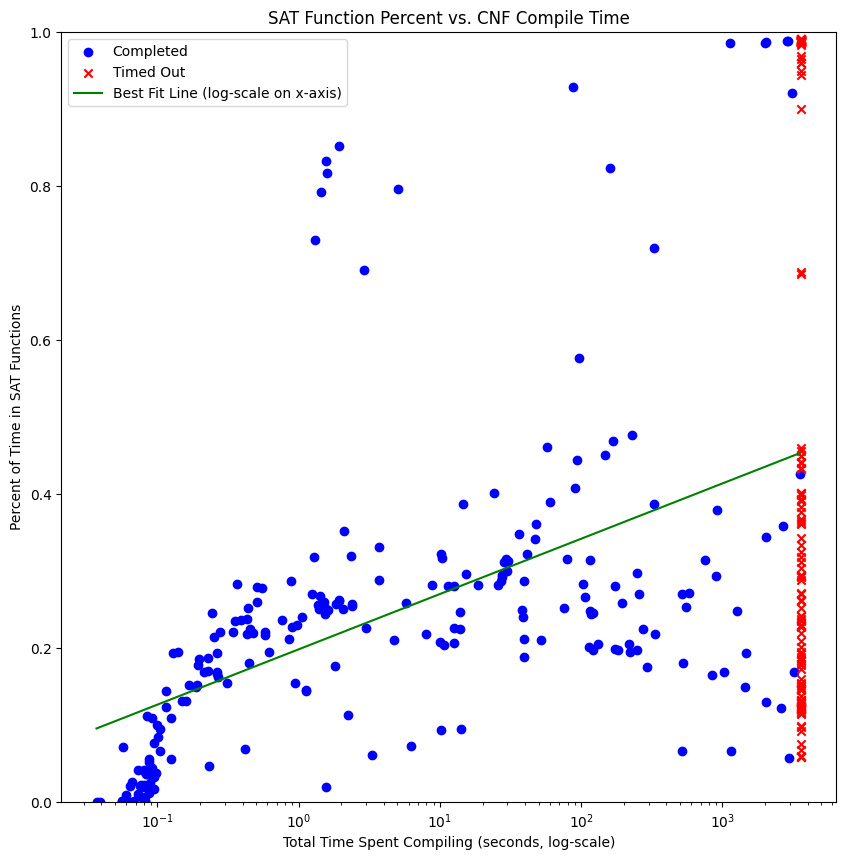

In [22]:
from SatPlotter import SatPlotter

sat_plotter = SatPlotter(cnf_stats_path=json_out)
sat_plotter.plot_sat_time_percent()